In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Test_mark_reviews.ipynb" "/content/drive/MyDrive/Tutorial_Deep_Learning_YT/Test_mark_reviews.ipynb"


In [41]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC
%matplotlib inline

In [15]:
max_words = 10000

In [16]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [4]:
def vectorize_sequences(sequences, dimension=15000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [17]:
X_train = vectorize_sequences(X_train, max_words)
X_test = vectorize_sequences(X_test, max_words)


In [36]:
model = Sequential([
    Input(shape=(max_words,)),
    Dense(128, activation='relu',  kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       AUC(name='AUC_ROC', curve='ROC'),
                       AUC(name='auc_pr', curve='PR')])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [38]:
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - AUC_ROC: 0.8675 - accuracy: 0.7914 - auc_pr: 0.8618 - loss: 1.0698 - val_AUC_ROC: 0.9334 - val_accuracy: 0.8280 - val_auc_pr: 0.9258 - val_loss: 0.5915
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC_ROC: 0.9401 - accuracy: 0.8712 - auc_pr: 0.9383 - loss: 0.5212 - val_AUC_ROC: 0.9438 - val_accuracy: 0.8732 - val_auc_pr: 0.9412 - val_loss: 0.5302
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC_ROC: 0.9434 - accuracy: 0.8746 - auc_pr: 0.9413 - loss: 0.5244 - val_AUC_ROC: 0.9414 - val_accuracy: 0.8688 - val_auc_pr: 0.9395 - val_loss: 0.5414
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC_ROC: 0.9431 - accuracy: 0.8746 - auc_pr: 0.9415 - loss: 0.5341 - val_AUC_ROC: 0.9448 - val_accuracy: 0.8780 - val_auc_pr: 0.9421 - val_loss: 0.5395


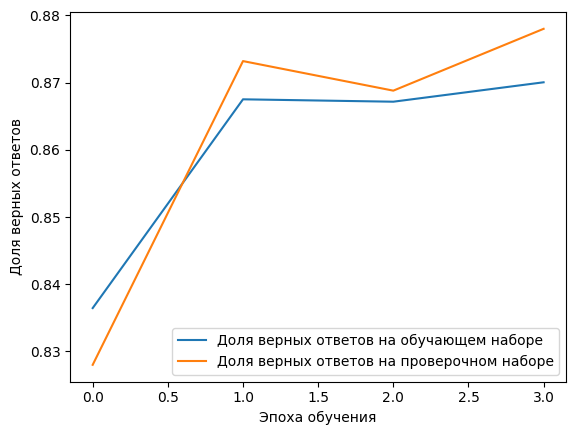

In [39]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [40]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC_ROC: 0.9418 - accuracy: 0.8702 - auc_pr: 0.9377 - loss: 0.5370
